In [2]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-ggbrumyw
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-ggbrumyw
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101077 sha256=69e857d0b29c77ca6a1fd1d7b58c85c95cb2fb969e3b385cc4b980ee888aecaf
  Stored in directory: /tmp/pip-ephem-wheel-cache-95smd3x1/wheels/bb/1f/f2/b57495012683b6b20bbae94a3915ec79753111452d79886abc
Successfully built keras-contrib


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2

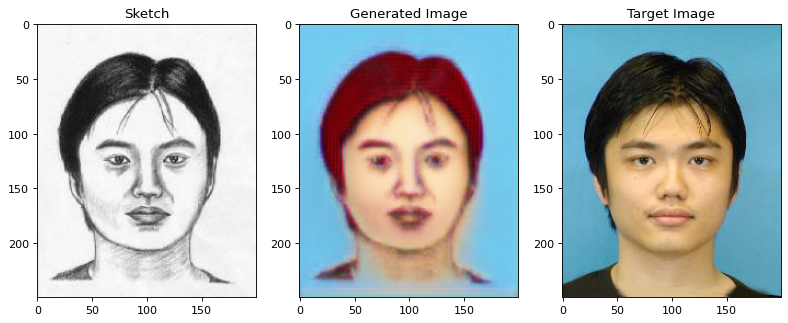

In [5]:
# Load Model
g_model = load_model('/content/gdrive/MyDrive/FaceCreation_ACM_Project/Face-Sketch-to-Image-Generation-using-GAN-master/Models/g_model1.h5',custom_objects={'InstanceNormalization':InstanceNormalization})

# load and resize the image
img = load_img('/content/gdrive/MyDrive/FaceCreation_ACM_Project/Face-Sketch-to-Image-Generation-using-GAN-master/Dataset/CUHK/Testing sketch/m1-001-01-sz1.jpg', target_size=(256, 256))
target = cv2.cvtColor(cv2.imread('/content/gdrive/MyDrive/FaceCreation_ACM_Project/Face-Sketch-to-Image-Generation-using-GAN-master/Dataset/CUHK/Testing photo/m1-001-01.jpg'), cv2.COLOR_BGR2RGB)

# convert to numpy array
img = img_to_array(img)
norm_img = (img.copy() - 127.5) / 127.5

g_img = g_model.predict(np.expand_dims(norm_img, 0))[0]
g_img = g_img * 127.5 + 127.5

img = cv2.resize(img, (200, 250))
g_img = cv2.resize(g_img, (200, 250))

f = plt.figure(num=None, figsize=(12, 6), dpi=80)
ax1 = f.add_subplot(1,3, 1)
plt.imshow(img.astype('uint8'))
ax2 = f.add_subplot(1,3, 2)
plt.imshow(g_img.astype('uint8'))
ax3 = f.add_subplot(1,3, 3)
plt.imshow(target.astype('uint8'))
ax1.set_title('Sketch')
ax2.set_title('Generated Image')
ax3.set_title('Target Image')

plt.show(block=True)